In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
test_df = pd.read_csv("ALS_TestingData_78.csv")
test_df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,BMI_max,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,...,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
0,3,65.906849,46.0,44.0,43,0.024590,-1.767329,33,5.0,2,0.028519,93,26.0,22,0.581967,72,24.0,21,0.418033,0.8,0.5,0.3,0.004098,27.0,25.0,23.0,0.032787,9.0,7.0,3.0,0.049180,7.9,7.1,5.7,0.018033,0.002969,91,76.0,69,0.180328,...,2,0.005520,-617,1,275,275.0,275,4.3,4.20,3.9,0.003279,90,77.0,61,0.237705,4700,4640,4450,2.049180,4,0.0,0,0.003680,139,138.0,137,0.016393,55888,7,0.0,0,0.006440,6.5,6.00,6.0,0.004098,8.57,7.680,6.60,0.016148
1,4,54.000000,39.0,36.0,33,0.013100,-1.351852,32,23.0,14,0.039301,47,35.5,21,0.056769,49,33.0,20,0.063319,1.2,0.7,0.3,0.001965,26.7,25.0,21.0,0.012445,19.0,9.5,5.0,0.030568,5.7,4.3,3.4,0.005022,0.002907,106,96.0,75,0.067686,...,11,0.002183,-328,4,349,270.0,215,4.6,4.20,3.8,0.001747,104,80.0,68,0.078603,5800,5100,4700,2.401747,4,4.0,3,0.002183,144,140.5,135,0.019651,61505,6,3.0,0,0.013100,6.5,5.50,5.0,0.003275,8.04,6.620,4.97,0.006703
2,5,56.394521,46.0,43.0,39,0.009736,-0.412429,15,10.0,2,0.017173,42,22.0,11,0.043115,37,22.0,14,0.031989,1.4,0.7,0.5,0.001252,27.0,24.0,20.0,0.009736,5.0,3.0,2.0,0.004172,8.2,5.4,2.9,0.007371,0.002281,85,72.5,65,0.026420,...,2,0.011889,-953,2,391,391.0,391,5.2,4.50,3.8,0.001947,123,103.5,70,0.070013,5130,4590,4190,1.307371,4,4.0,0,0.005284,141,139.0,136,0.006954,63255,0,0.0,0,0.000000,7.5,6.75,6.0,0.003456,8.90,7.160,5.01,0.005410
3,6,72.619178,50.0,42.5,41,0.092784,-0.383403,34,24.0,21,0.033592,109,39.5,20,0.917526,83,42.0,23,0.618557,0.9,0.7,0.3,0.006186,27.0,26.0,25.0,0.020619,9.0,5.0,3.0,0.061856,7.5,5.2,3.9,0.037113,0.002408,67,59.0,54,0.134021,...,2,0.015504,-490,1,383,383.0,383,4.8,4.50,4.4,0.004124,76,73.0,63,0.134021,4190,3950,3780,4.226804,4,4.0,3,0.002584,143,140.0,138,0.051546,70641,8,5.5,5,0.007752,7.5,7.00,6.0,0.024194,12.38,7.905,4.96,0.076495
4,9,65.000000,45.0,42.0,36,0.021327,0.000000,37,37.0,37,0.000000,48,16.5,13,0.082938,272,25.0,22,0.592417,1.1,0.8,0.6,0.001185,27.4,22.9,19.3,0.019194,12.0,9.5,5.0,0.016588,7.5,6.1,4.5,0.007109,0.002731,102,85.0,69,0.078199,...,12,0.000000,-329,4,357,258.0,229,5.1,4.45,4.1,0.002370,84,67.5,59,0.059242,5000,4700,4400,1.421801,4,4.0,4,0.000000,146,144.0,140,0.014218,108342,7,7.0,7,0.000000,6.0,5.50,5.0,0.002370,11.53,9.290,7.94,0.008507


In [41]:
test_df.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Basophils_max,Basophils_median,Basophils_min,Basophils_range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Bilirubin..total._max,Bilirubin..total._median,Bilirubin..total._min,Bilirubin..total._range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,BMI_max,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,...,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,Red.Blood.Cells..RBC._max,Red.Blood.Cells..RBC._median,Red.Blood.Cells..RBC._min,Red.Blood.Cells..RBC._range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Urine.Ph_range,White.Blood.Cell..WBC._max,White.Blood.Cell..WBC._median,White.Blood.Cell..WBC._min,White.Blood.Cell..WBC._range
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.00000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.00000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,51.589744,56.025571,45.256410,42.173077,38.910256,0.016753,-0.825866,29.807692,21.544872,14.705128,0.028159,59.076923,32.397436,22.358974,0.108998,48.333333,28.871795,21.089744,0.082340,1.515385,0.675000,0.319231,0.003285,27.921795,24.489103,21.187179,0.018107,12.27359,8.116795,5.198718,0.022924,7.719513,5.752032,4.204667,0.010031,0.002631,90.564103,80.141026,67.551282,0.057330,...,6.24359,0.007931,-516.589744,2.602564,311.884615,282.666667,261.153846,4.643590,4.169231,3.774359,0.002279,95.961538,78.769231,64.705128,0.076282,5070.512821,4716.474359,4360.128205,1.994449,3.846154,3.000000,1.897436,0.003678,143.192308,140.269231,137.448718,0.015560,523969.807692,5.666667,3.532051,1.871795,0.007133,7.076923,6.192308,5.564103,0.004544,9.341795,6.789103,5.286026,0.012203
std,28.468910,10.514606,3.056549,3.083341,3.977815,0.013419,0.649497,6.107389,8.995015,9.532050,0.014650,34.549708,14.820431,10.741320,0.142435,32.390742,9.358459,6.265108,0.114994,0.758857,0.210712,0.205798,0.003158,2.745700,2.202812,2.285718,0.011415,5.77224,3.241326,2.279081,0.037498,2.138344,1.524767,1.290092,0.007951,0.000405,8.730585,7.300995,7.315963,0.036190,...,4.24321,0.006029,217.304947,1.143471,78.767615,65.079605,71.993520,0.383622,0.216859,0.253513,0.001243,13.672840,9.881339,8.363664,0.047435,426.321924,372.235358,405.262441,2.020000,0.428738,1.258736,1.499695,0.003095,2.198333,1.483004,1.958315,0.009760,263604.275459,2.105445,2.511454,2.211886,0.003980,0.674570,0.572536,0.458392,0.004776,2.939529,1.683264,1.513861,0.014724
min,3.000000,24.583562,38.000000,35.000000,25.000000,0.004138,-3.041667,13.000000,2.000000,0.000000,0.000000,20.000000,14.500000,8.000000,0.015075,20.000000,16.000000,12.000000,0.013453,0.500000,0.300000,0.000000,0.000700,22.100000,20.000000,16.100000,0.005208,5.00000,3.000000,2.000000,0.003878,4

In [ ]:
train_df = pd.read_csv("ALS_TrainingData_2223.csv")
train_df.head()

In [ ]:
train_df.info()

In [ ]:
train_df.describe()

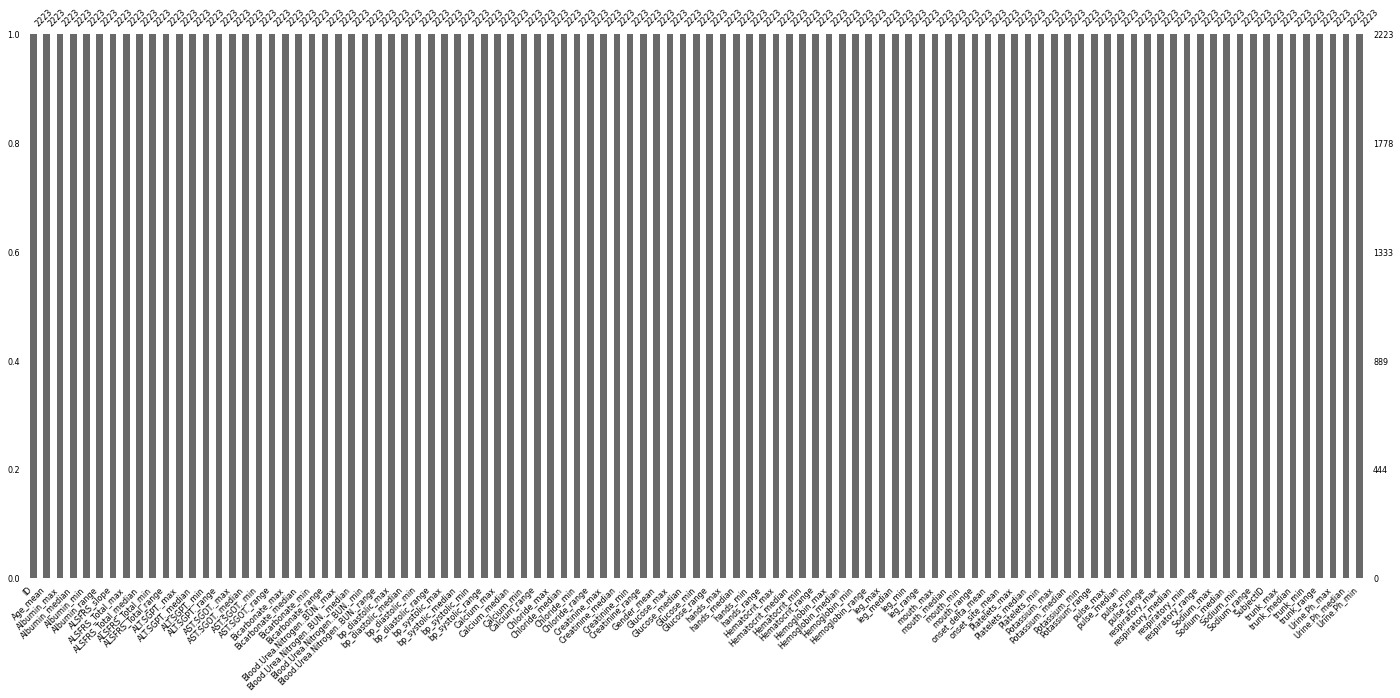

In [14]:
#Visualizing null values using msno(MissingNO) function

import missingno as msno
msno.bar(train_df,labels=True,fontsize=8)


In [24]:
train_dfmodel = train_df.drop(labels=['ID','SubjectID'],axis=1)
test_dfmodel = test_df.drop(labels=['ID','SubjectID'],axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f869b8629d0>,
      dtype=object)

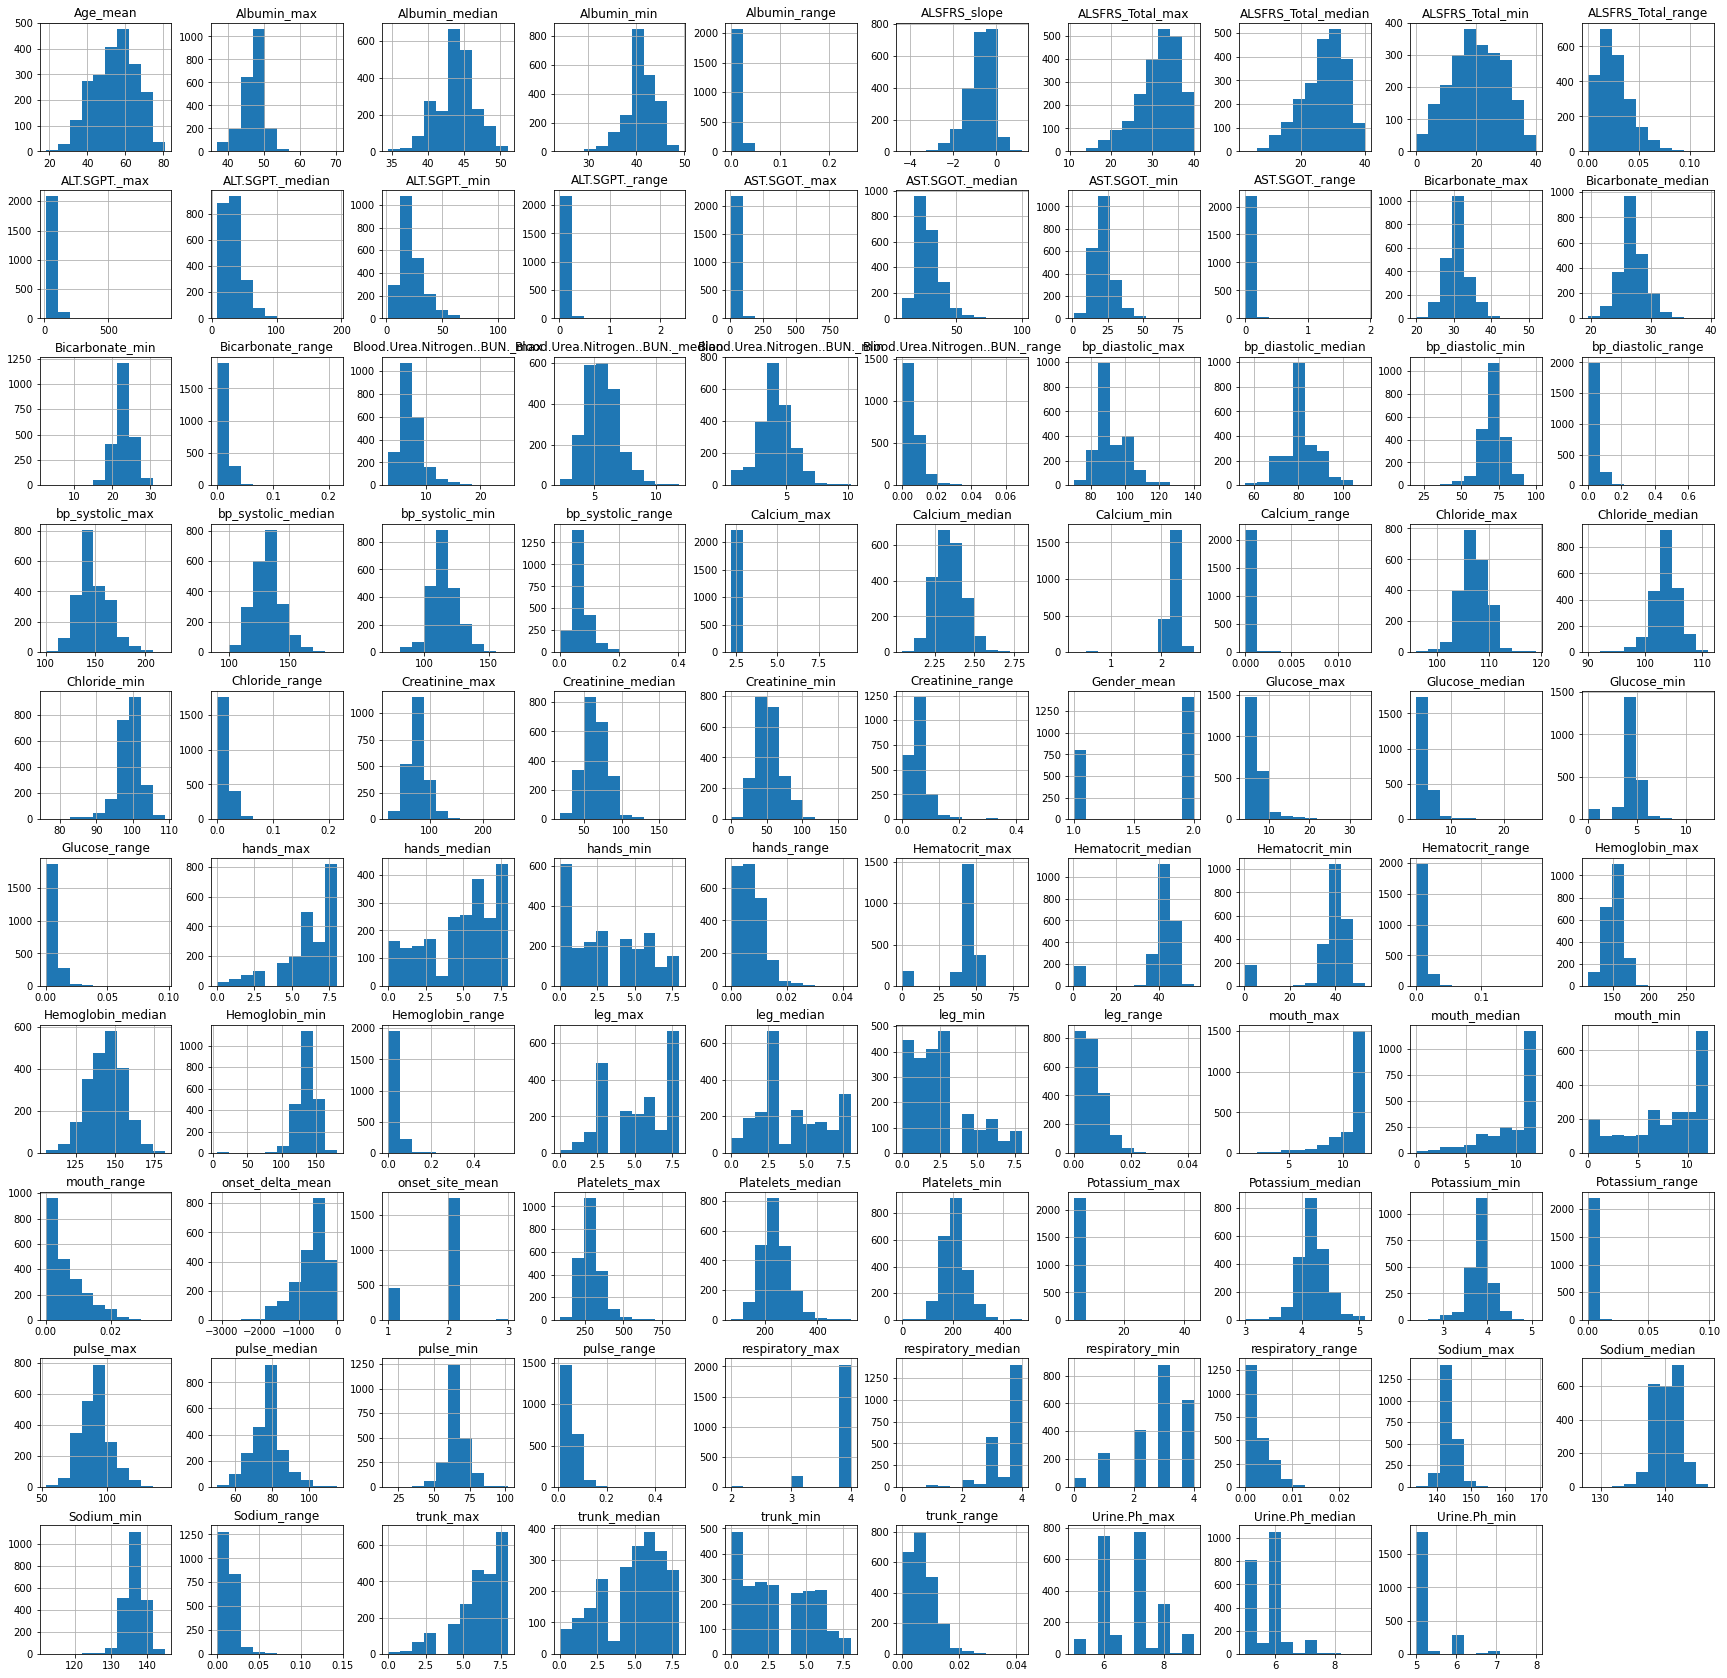

In [16]:
train_dfmodel.hist(figsize = (30, 30))

In [18]:
columns = train_dfmodel.columns

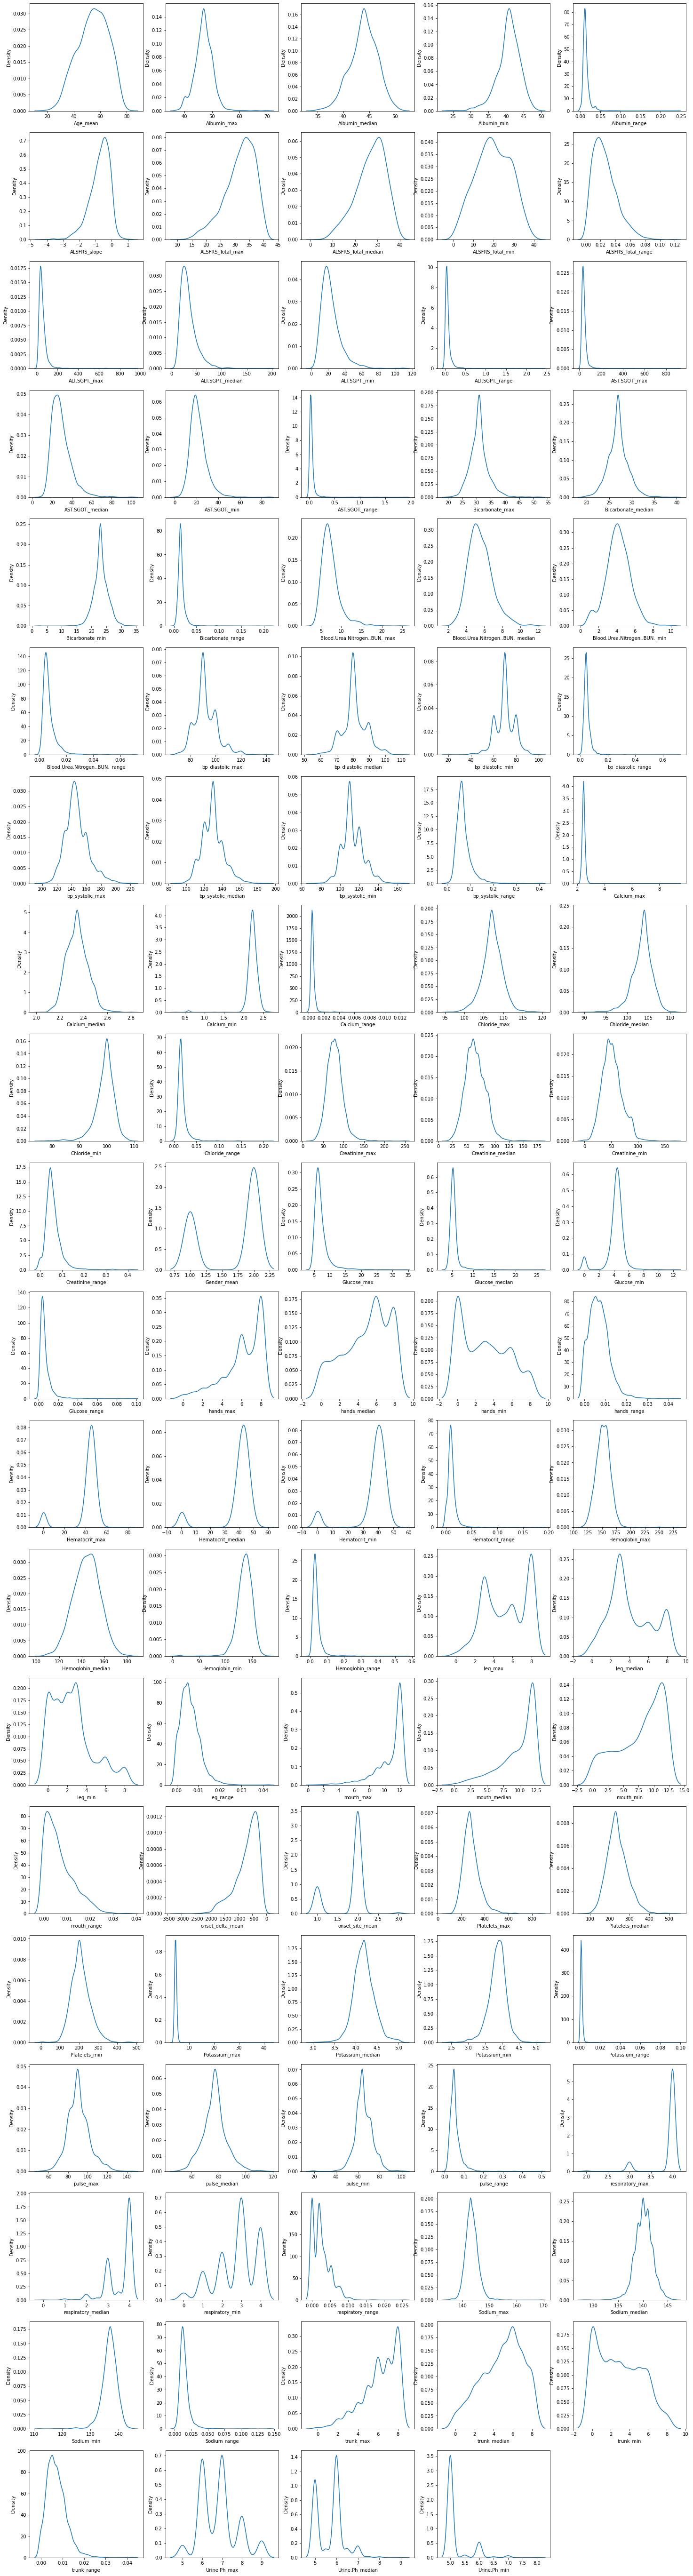

In [19]:
plt.figure(figsize=(25,120))
for j, cols in enumerate(train_dfmodel.columns):
      if train_dfmodel[cols].dtype != 'object':
        ax = plt.subplot(24,5, j+1)
        sns.kdeplot(train_dfmodel[cols],ax=ax)
        plt.xlabel(cols)
        
plt.show()

In [26]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
X_train = pca.fit_transform(train_dfmodel)
X_test = pca.fit_transform(test_dfmodel)

X_test.shape


(78, 2)

In [36]:
def Kmeans(n):
  Kmeans = KMeans(n_clusters=n)
  cluster_label = Kmeans.fit_predict(X_train)
  print("Trained Model:",X_train)
  print("\nCluster Lables:",cluster_label)
  myset = set(cluster_label)
  print("\nCluster values:",myset)

  cluster_label_0_df = X_train[cluster_label==0]
  cluster_label_1_df = X_train[cluster_label==1]
  cluster_label_2_df = X_train[cluster_label==2]
  cluster_label_3_df = X_train[cluster_label==3]
  cluster_label_4_df = X_train[cluster_label==4]

  fig, ax = plt.subplots(figsize=(15,10))

  plt.scatter(cluster_label_0_df[:,0] , cluster_label_0_df[:,1] , color = 'red')
  plt.scatter(cluster_label_1_df[:,0] , cluster_label_1_df[:,1] , color = 'black')
  plt.scatter(cluster_label_2_df[:,0] , cluster_label_2_df[:,1] , color = 'blue')
  plt.scatter(cluster_label_3_df[:,0] , cluster_label_3_df[:,1] , color = 'green')
  plt.scatter(cluster_label_4_df[:,0] , cluster_label_4_df[:,1] , color = 'pink')

plt.show()

 

In [ ]:
Kmeans(5)

In [ ]:
Kmeans(4)

In [ ]:
Kmeans(3)

**Using Elbow Method to find the optimal K value**

In [ ]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping = {}
K_values = range(1, 10)
 
for k in K_values:
    # Building and fitting the model
    km = KMeans(n_clusters=k)
    km.fit(X_train)
 
    distortions.append(sum(np.min(cdist(X_train, km.cluster_centers_,
                                        'euclidean'), axis=1)) / X_train.shape[0])
 
    mapping[k] = sum(np.min(cdist(X_train, km.cluster_centers_,
                                   'euclidean'), axis=1)) / X_train.shape[0]


In [ ]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 343.6571426228154
2 : 213.92255598418762
3 : 160.2748286777485
4 : 134.19450992203994
5 : 119.57543876449229
6 : 109.77125687782491
7 : 102.45731539565828
8 : 95.14365331973441
9 : 93.41223892129133


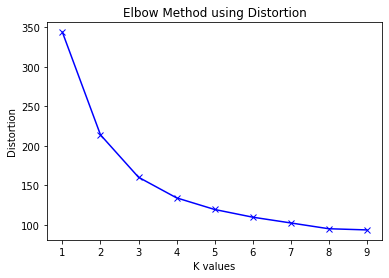

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('K values')
plt.ylabel('Distortion')
plt.title('Elbow Method using Distortion')
plt.show()

Test Model: [[  214.00621186  -258.98012049]
 [ -845.45044332   315.66955858]
 [  121.42434596  -292.10044745]
 [ 1290.45020343  -101.61071939]
 [   33.40793728   126.59182737]
 [ 1591.20898463    82.45625888]
 [  -90.24922526   106.25787088]
 [  212.46277873    80.67481231]
 [   29.25100536   -39.56287674]
 [ -433.86267273    -4.07335782]
 [  276.57904811  -499.03613504]
 [ -762.9847835    140.16816152]
 [  482.61836019    50.49175634]
 [ -229.4468784    329.41119946]
 [  677.47260674    47.08176547]
 [   27.87367234  -139.70246011]
 [-1202.43188358  -306.5490243 ]
 [ -585.50238209  -108.29600296]
 [ -429.12741591   207.94658286]
 [ -319.19049125   -98.57688243]
 [ -369.20424714    86.71161454]
 [  -46.17272053  -152.1221227 ]
 [ -261.72405324   -15.71960618]
 [-1537.32725964   507.8497168 ]
 [  -98.88428786  -442.72971157]
 [ -914.1625308    268.12029257]
 [ 1346.35976154  -181.42064538]
 [ 1371.11138719   442.65211087]
 [  -33.28421726   -58.18428919]
 [  302.5274572     53.99393671

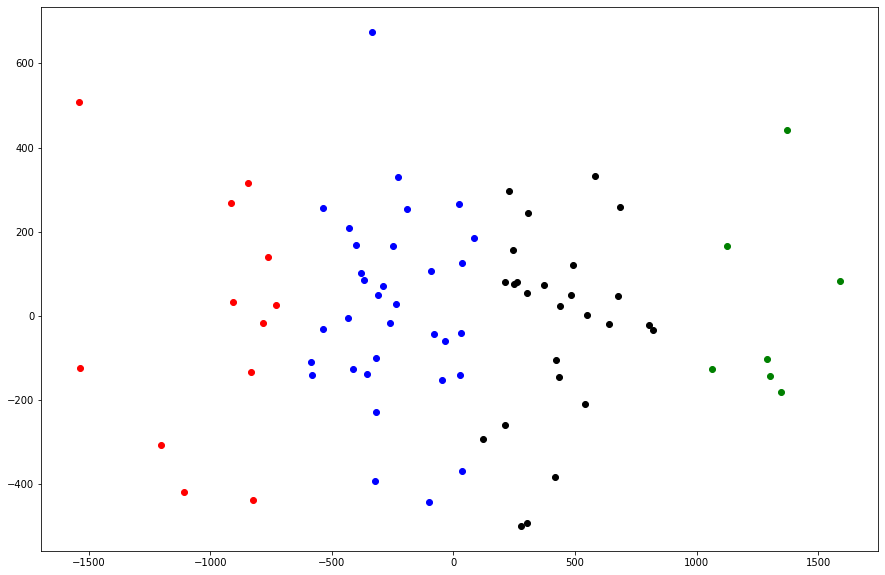

In [46]:
Kmeans = KMeans(n_clusters=4)
cluster_label = Kmeans.fit_predict(X_test)
print("Test Model:",X_test)
print("\nCluster Lables:",cluster_label)
myset = set(cluster_label)
print("\nCluster values:",myset)

cluster_label_0_df = X_test[cluster_label==0]
cluster_label_1_df = X_test[cluster_label==1]
cluster_label_2_df = X_test[cluster_label==2]
cluster_label_3_df = X_test[cluster_label==3]
cluster_label_4_df = X_test[cluster_label==4]

fig, ax = plt.subplots(figsize=(15,10))

plt.scatter(cluster_label_0_df[:,0] , cluster_label_0_df[:,1] , color = 'red')
plt.scatter(cluster_label_1_df[:,0] , cluster_label_1_df[:,1] , color = 'black')
plt.scatter(cluster_label_2_df[:,0] , cluster_label_2_df[:,1] , color = 'blue')
plt.scatter(cluster_label_3_df[:,0] , cluster_label_3_df[:,1] , color = 'green')
plt.scatter(cluster_label_4_df[:,0] , cluster_label_4_df[:,1] , color = 'pink')

plt.show()

 

Trained Model: [[  214.00621186  -258.98012049]
 [ -845.45044332   315.66955858]
 [  121.42434596  -292.10044745]
 [ 1290.45020343  -101.61071939]
 [   33.40793728   126.59182737]
 [ 1591.20898463    82.45625888]
 [  -90.24922526   106.25787088]
 [  212.46277873    80.67481231]
 [   29.25100536   -39.56287674]
 [ -433.86267273    -4.07335782]
 [  276.57904811  -499.03613504]
 [ -762.9847835    140.16816152]
 [  482.61836019    50.49175634]
 [ -229.4468784    329.41119946]
 [  677.47260674    47.08176547]
 [   27.87367234  -139.70246011]
 [-1202.43188358  -306.5490243 ]
 [ -585.50238209  -108.29600296]
 [ -429.12741591   207.94658286]
 [ -319.19049125   -98.57688243]
 [ -369.20424714    86.71161454]
 [  -46.17272053  -152.1221227 ]
 [ -261.72405324   -15.71960618]
 [-1537.32725964   507.8497168 ]
 [  -98.88428786  -442.72971157]
 [ -914.1625308    268.12029257]
 [ 1346.35976154  -181.42064538]
 [ 1371.11138719   442.65211087]
 [  -33.28421726   -58.18428919]
 [  302.5274572     53.99393

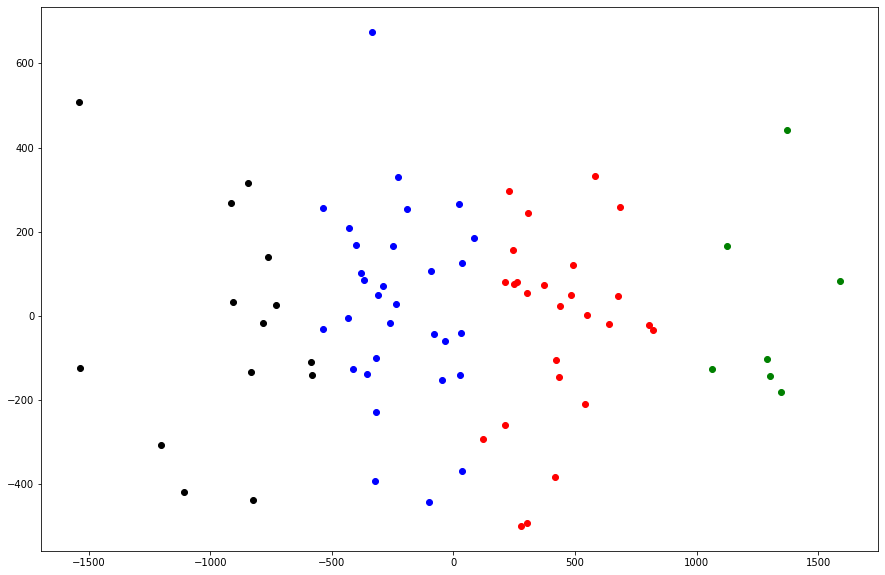

In [43]:
KmeansTest(4)

In [64]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=21)
kmeans.fit(X_train)

print('Silhoutte score of our model is ' + str(silhouette_score(X_train, kmeans.labels_)))

Silhoutte score of our model is 0.5953588151314846
